# PAKIETY:

In [1]:
#cały projekt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick
from PIL import Image
#wykres 1
import pygal
import pygal_maps_world
import cairosvg
import os
os.environ['path'] += r';C:\Program Files\GTK3-Runtime Win64\bin'
#wykres 2
from matplotlib import cm
#wykres 7
import igraph as ig

# WIZUALIZACJA 1 - MAPA ŚWIATA

# ŹRÓDŁA:

In [2]:
#https://www.nielsen.com/wp-content/uploads/sites/3/2019/04/global-ingredient-and-out-of-home-dining-trends-aug-2016.pdf

# DANE:

In [3]:
X=[25, 42, 75, 80, 115, 105]
Y=[73, 30, 77, 43, 68, 20]
N=['Ameryka Północna', 'Ameryka Południowa', 'Europa', 'Afryka & Bliski Wschód', "Azja & Oceania", "Ogólnoświatowo"]
V=['6%', "8%", "5%", "16%", "19%", "14%"]

# WIZUALIZACJA:

# Stworzenie mapy:

In [4]:
mapa = pygal.maps.world.World()
mapa.add('Afryka&Bl.Wsch.', ['ao', 'zw', 'zm', 'za', 'ye', 'ug', 'tz', 'tr', 'tn', 'tg', 'td', 'sz', 'st', 'sy', 
                                       'so','sn', 'sl', 'sd', 'sc', 'sa', 'rw', 'om', 'ng', 'ne', 'mz', 'mw', 'mu', 'mr', 
                                      'ml', 'mg', 'ae', 'bf', 'bh', 'bi', 'bj', 'bw', 'cd', 'cf', 'cg', 'ci', 'cm', 'cv', 
                                      'cy','dj', 'dz', 'eh', 'eg', 'er', 'et', 'ga', 'gh', 'gm', 'gn', 'gq', 'gw', 'iq',
                                      'ir', 'il', 'jo', 'ke', 'kw', 'lb', 'ls', 'lr', 'ly', 'ma', 'na'])
mapa.add('Europa', ['ad', 'al', 'at', 'es', 'pt', 'fr', 'gb', 'ie', 'is', 'no', 'se', 'fi', 'dk', 'be', 'nl', 'ch', 
                             'at', 'it', 'de', 'pl', 'li', 'lu', 'sm', 'lt', 'lv', 'ee', 'by', 'ua', 'md', 'ro', 'bg', 'cz', 
                              'si', 'sk', 'hu', 'rs', 'hr', 'ba', 'gl', 'gr', 'mk', 'mt', 'me']) 
mapa.add('Am. Północna', ['ca', 'us'])
mapa.add('Am. Łacińska', ['ar', 'bo', 'cl', 'uy', 'br', 'py', 'pe', 'sr', 'gy', 'ec', 've', 'gf', 
                                        'co', 'cr', 'cu', 'ni', 'mx', 'gt', 'hn', 'pa', 'bz', 'do', 'ht', 'sv'])
mapa.add('Azja&Oceania', ['af', 'am', 'ru', 'ge', 'az', 'mn', 'cn', 'kp', 'kr', 'jp', 'ph', 'au', 'nz', 'pg', 
                                   'tl', 'id', 'my', 'bn', 'vn', 'la', 'kh', 'th', 'in', 'bd', 'np', 'bt', 'kg', 'kz', 'pk', 
                                   'tj', 'tm', 'uz', 'mm', 'lk', 'tw'])
mapa.render_to_png('mapa.png')

# Przygotowanie obrazka:

In [5]:
im=Image.open("mapa.png")
width, height = im.size

left = 190
top = 130
right = 779
bottom = 450

im1=im.crop((left, top, right, bottom))

# Stworzenie finalnej wizualizacji:

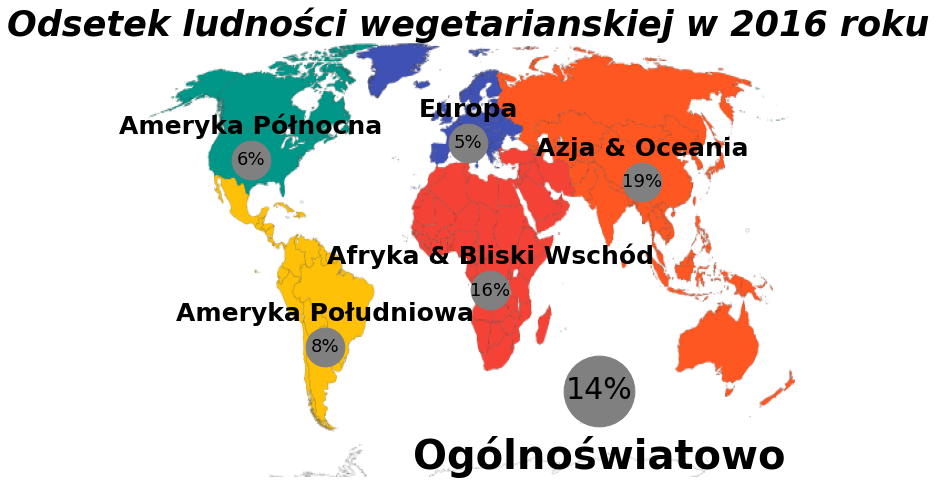

In [6]:
plt.rcParams["figure.figsize"] = (16,8)
fig,ax = plt.subplots()
im = ax.imshow(im1, extent=[0, 150, 0, 100])
for n in range(0,len(X)-1):
    ax.scatter(X[n], Y[n], label=N[n], s=1500 , zorder=5, color="grey")
    plt.annotate(N[n], (X[n], Y[n]), xytext=(X[n], Y[n]+6), ha='center', zorder=6, size=25, fontweight='bold')
    plt.annotate(V[n], (X[n], Y[n]), ha='center', va="center", zorder=6, size=18)
ax.scatter(X[5], Y[5], label=N[5], s=5000 , zorder=5, color="grey")
plt.annotate(N[5], (X[5], Y[5]), xytext=(X[5], Y[5]-18), ha='center', zorder=6, size=40, fontweight='bold')
plt.annotate(V[5], (X[5], Y[5]), ha='center', va="center", zorder=6, size=30)
plt.axis('off')
plt.title("Odsetek ludności wegetarianskiej w 2016 roku", size=35, style='oblique', fontweight='bold')
plt.savefig("Wizualizacja 1 - Mapa świata.png")
plt.show()

# WIZUALIZACJA 2 - TOP 10 PAŃSTW

# ŹRÓDŁA:

In [7]:
#https://www.worldatlas.com/articles/countries-with-the-highest-rates-of-vegetarianism.html

# DANE:

In [25]:
Kraje=["Australia", 'Irlandia', 'Brazylia', 'Wielka Brytania', "Niemcy","Austria", "Włochy", "Taiwan","Izrael",'Indie']
Wartości=[5,6,8,9,9,9,10,12,13,38]
df=pd.DataFrame({'Kraj': Kraje, 'Procent': Wartości})

,Kraj,Procent
0,Australia,5
1,Irlandia,6
2,Brazylia,8
3,Wielka Brytania,9
4,Niemcy,9
5,Austria,9
6,Włochy,10
7,Taiwan,12
8,Izrael,13
9,Indie,38


# WIZUALIZACJA:

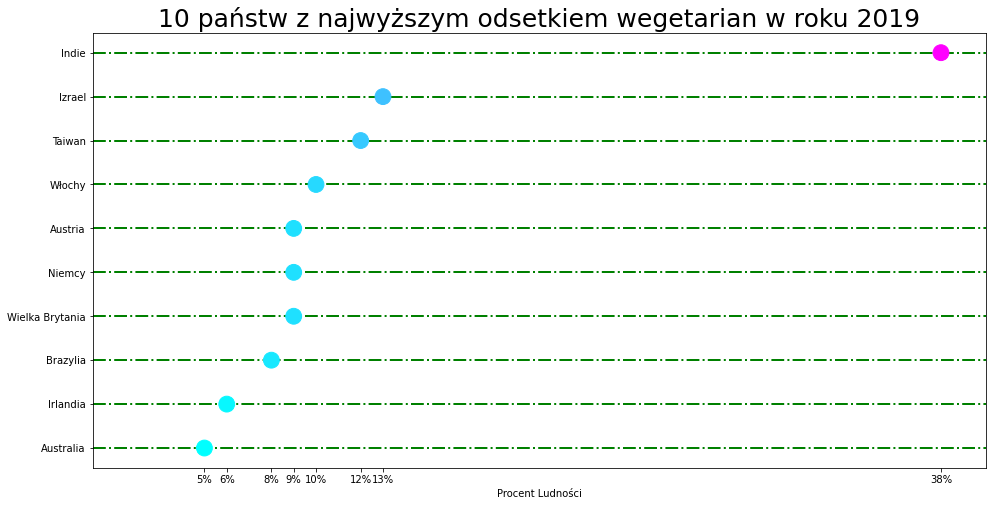

In [42]:
fig, ax = plt.subplots()

ax.hlines(y=df.Kraj, xmin=0, xmax=df['Procent'].max()+2, color='green', linewidth=2, linestyles='dashdot')
ax.scatter(y=df.Kraj, x=df.Procent, s=250, c=df.Procent, cmap=cm.get_cmap('cool') ,zorder=2)

ax.set_title('10 państw z najwyższym odsetkiem wegetarian w roku 2019', fontsize=25)
ax.set_xlabel('Procent Ludności')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(100, decimals=0))
ax.set_xlim(0, df['Procent'].max()+2)
ax.set_xticks(df.Procent.unique())

plt.savefig("Wizualizacja 2 - TOP 10 Państw.png")
plt.show()

# WIZUALIZACJA 3 - ODŻYWANIE W EUROPIE

# ŹRÓDŁA:

In [10]:
#https://en.wikipedia.org/wiki/Vegetarianism_by_country
#https://vegconomist.com/studies-and-numbers/soon-less-than-42-of-europeans-will-consume-meat-dairy/

# DANE:

In [11]:
countries=['Dania', 'Estonia', 'Finlandia', 'Włochy', 'Łotwa', 
           'Litwa', 'Holandia', 'Norwegia', 'Szwecja', 'Szwajcaria']
vege=[10, 6, 11, 8.9, 5, 6, 5, 9, 12, 5]
vegan=[4, 1, 2, 2.2, 1, 1, 1, 4, 4, 1]

amofvege=3.1
amofvegan=1.9

# WIZUALIZACJA:

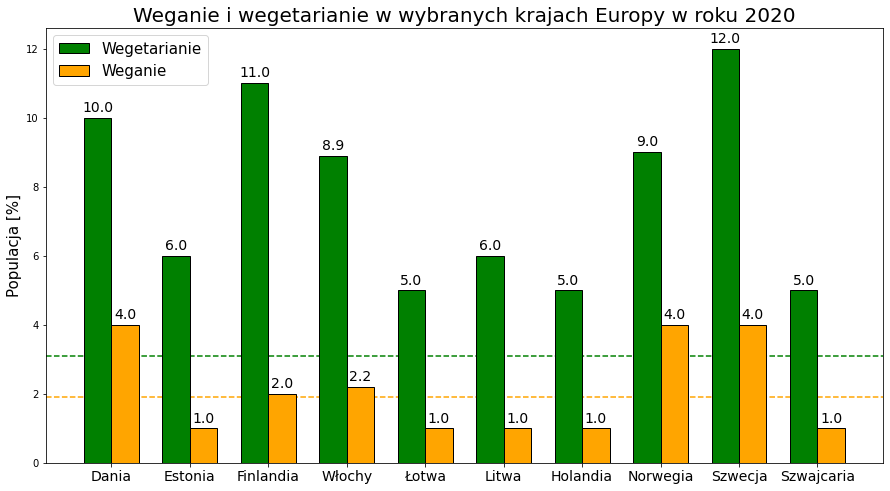

In [12]:
x = np.arange(len(countries))
width = 0.35

fig, ax=plt.subplots(figsize=(15,8))
vegeplot=ax.bar(x - width/2, vege, width, label='Wegetarianie',color='green',edgecolor='black')
veganplot=ax.bar(x + width/2, vegan, width, label='Weganie',color='orange',edgecolor='black')

ax.set_ylabel('Populacja [%]', fontsize=15)
ax.set_title('Weganie i wegetarianie w wybranych krajach Europy w roku 2020',size=20)
ax.set_xticks(x)
ax.set_xticklabels(countries, fontsize=14)
ax.legend(fontsize=15)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x()+rect.get_width()/2, height),
                    xytext=(0,3),textcoords="offset points",ha='center', va='bottom', fontsize=14)

ax.axhline(y=amofvege, color='green',zorder=0.5, linestyle='--')
ax.axhline(y=amofvegan, color='orange',zorder=0.5, linestyle='--')

autolabel(vegeplot)
autolabel(veganplot)
plt.savefig('Wizualizacja 3 - Odżywianie w Europie.png',transparent=True)
plt.show()

# WIZUALIZACJA 4 - POWODY DIETY WEGAŃSKIEJ

# ŹRÓDŁA:

In [13]:
#https://vomadlife.com/blogs/news/why-people-go-vegan-2019-global-survey-results
#https://www.vegansociety.com/go-vegan/why-go-vegan

# DANE:

In [14]:
per=[68.1,17.4,9.7,4.8]
why=['ze względu na zwierzęta','z powodów zdrowotnych','ze względu na środowisko','inne powody']

# WIZUALIZACJA:

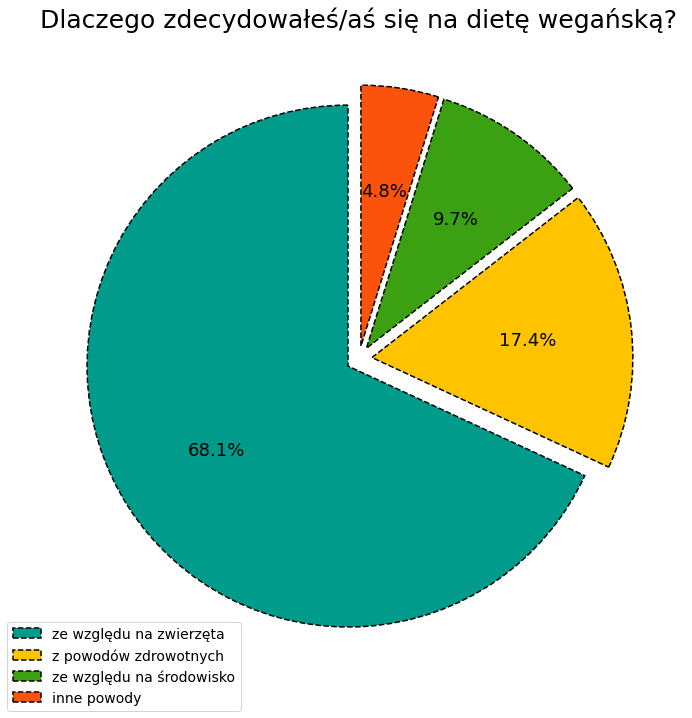

In [15]:
fig=plt.figure(figsize=(12,12))
colors=['#009B8B','#FFC300','#3BA012','#FC530C']
plt.pie(per,colors=colors, autopct='%1.1f%%',startangle=90,
        wedgeprops={"edgecolor":"0",'linewidth': 1.5,
                    'linestyle': '--', 'antialiased': True},textprops={'size': 18},explode=(0.05,0.05,0.05,0.05))

plt.legend(why,fontsize=14,loc='lower left',bbox_to_anchor=(-0.05, -0.05))
plt.title("Dlaczego zdecydowałeś/aś się na dietę wegańską?",fontsize=25)
plt.savefig('Wizualizacja 4 - Powody diety wegańskiej.png',transparent=True)
plt.show()

# WIZUALIZACJA 5 - DANE NA PRZESTRZENI CZASU

# ŹRÓDŁA:

In [16]:
#https://www.researchgate.net/publication/254412281_An_Estimate_of_the_Number_of_Vegetarians_in_the_World

# DANE:

In [17]:
data = pd.read_excel('danevege2.xlsx')
data.drop(data.iloc[:,7:11], inplace = True, axis=1)
data.drop(data.iloc[:,2:6], inplace = True, axis=1)
data=data.rename(columns={'Country': "Kraj", 'Year': 'Rok', '% vegetarians': '% wegetarian'})
data["Kraj"]=data["Kraj"].replace(['Jamaica'], 'Jamajka')
wartości=data['% wegetarian'].tolist()
for n in range(0, len(wartości)):
    wartości[n]=round(100*wartości[n], 1)
data['% wegetarian']=wartości
data=data.pivot(index='Rok', columns='Kraj', values='% wegetarian')

# WIZUALIZACJA:

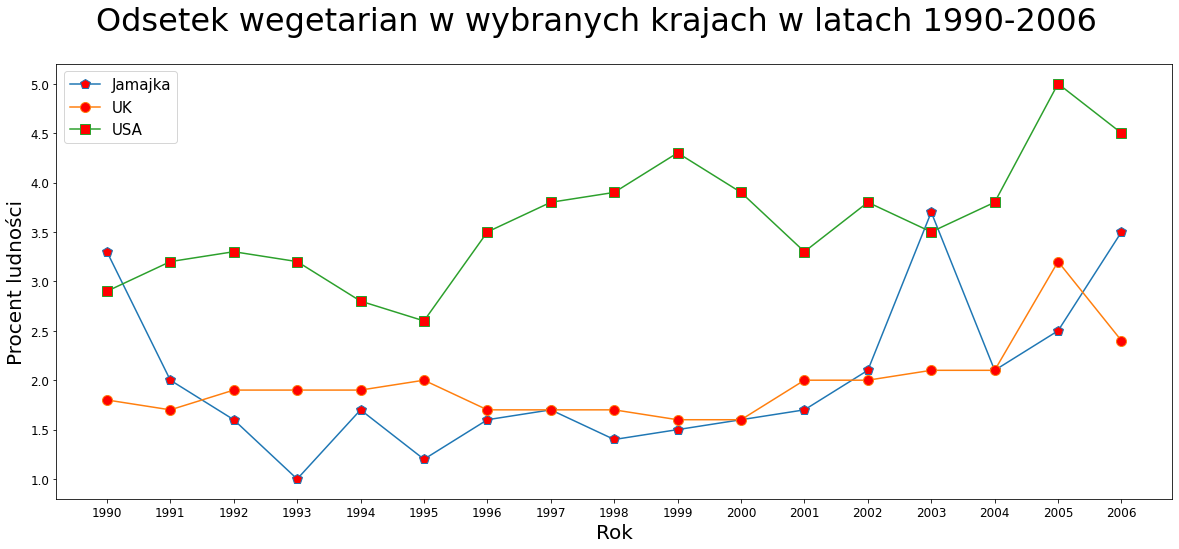

In [50]:
fig, ax = plt.subplots(figsize=(20,8))
plt.xlabel("Rok", fontsize=20)
plt.ylabel("Procent ludności", fontsize=20)
plt.suptitle("Odsetek wegetarian w wybranych krajach w latach 1990-2006", fontsize=32)
data.plot(xticks=data.index, ax=ax , fontsize=12, style=['p-', 'o-', 's-'], markerfacecolor="red", markersize=10)
ax.legend(fontsize=15)
plt.savefig("Wizualizacja 5 - Dane od czasu.png")
plt.show()

# WIZUALIZACJA 6 - PIRAMIDY WIEKU

# ŹRÓDŁA:

In [19]:
#https://www.vrg.org/nutshell/Polls/2019_adults_veg.htm
#https://www.vrg.org/journal/vj2020issue4/2020_issue4_poll_results.php
#https://www.finder.com/uk/uk-diet-trends

# DANE:

In [20]:
df1 = pd.DataFrame({'Wiek': ['18-34','35-44','45-54','55-64','65+'], 
                    'USA2020': [6, 8, 4, 4, 5], 
                    'USA2019': [5, 6, 1, 3, 2]})
                    
df2 = pd.DataFrame({'Wiek': ['18-24','25-44','45-54','55-64','65+'], 
                    'UK2020': [14, 15, 14, 11, 9],
                    'UK2021': [26, 16, 15, 5, 4]})

# WIZUALIZACJA:

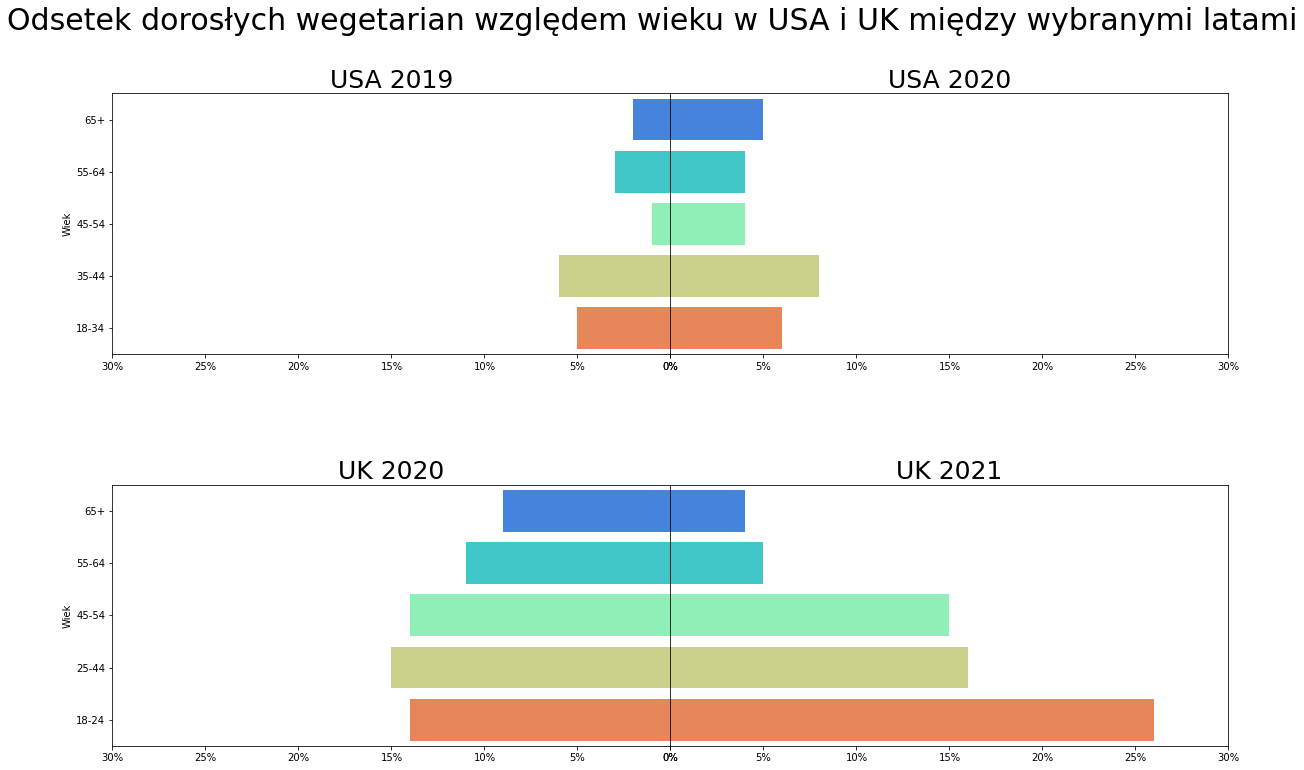

In [21]:
figure, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,12))
figure.suptitle('Odsetek dorosłych wegetarian względem wieku w USA i UK między wybranymi latami', fontsize=30)

axes[0,0].set_title('USA 2019', fontsize=25)
axes[0,1].set_title('USA 2020', fontsize=25)
axes[1,0].set_title('UK 2020', fontsize=25)
axes[1,1].set_title('UK 2021', fontsize=25)
        
sns.barplot(ax=axes[0,0], x=df1['USA2019'], y=df1.Wiek, order=list(reversed(df1["Wiek"])), palette="rainbow")
sns.barplot(ax=axes[0,1], x=df1['USA2020'], y=df1.Wiek, order=list(reversed(df1["Wiek"])), palette="rainbow")
sns.barplot(ax=axes[1,0], x=df2['UK2020'], y=df2.Wiek, order=list(reversed(df2["Wiek"])), palette="rainbow")
sns.barplot(ax=axes[1,1], x=df2['UK2021'], y=df2.Wiek, order=list(reversed(df2["Wiek"])), palette="rainbow")

for n in range(0,2):
    for m in range(0,2):
        axes[n,m].xaxis.set_major_formatter(mtick.PercentFormatter(100, decimals=0))
        axes[n,m].set_xlabel('')
        axes[n,m].set_xlim(0, 30)
        if m%2==0:
            axes[n,m].invert_xaxis()
            axes[n,m+1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0, hspace=0.5)
plt.savefig("Wizualizacja 6 - Piramidy wieku.png")

# WIZUALIZACJA 7 - MAPA MYŚLI/GRAF

# ŹRÓDŁA:

In [22]:
#https://veganuary.com/veganuary-2021-survey-results/

# DANE I WIZUALIZACJA:

In [23]:
#plan grafu uprzednio rozpisany w pliku "Graf rozpiska"

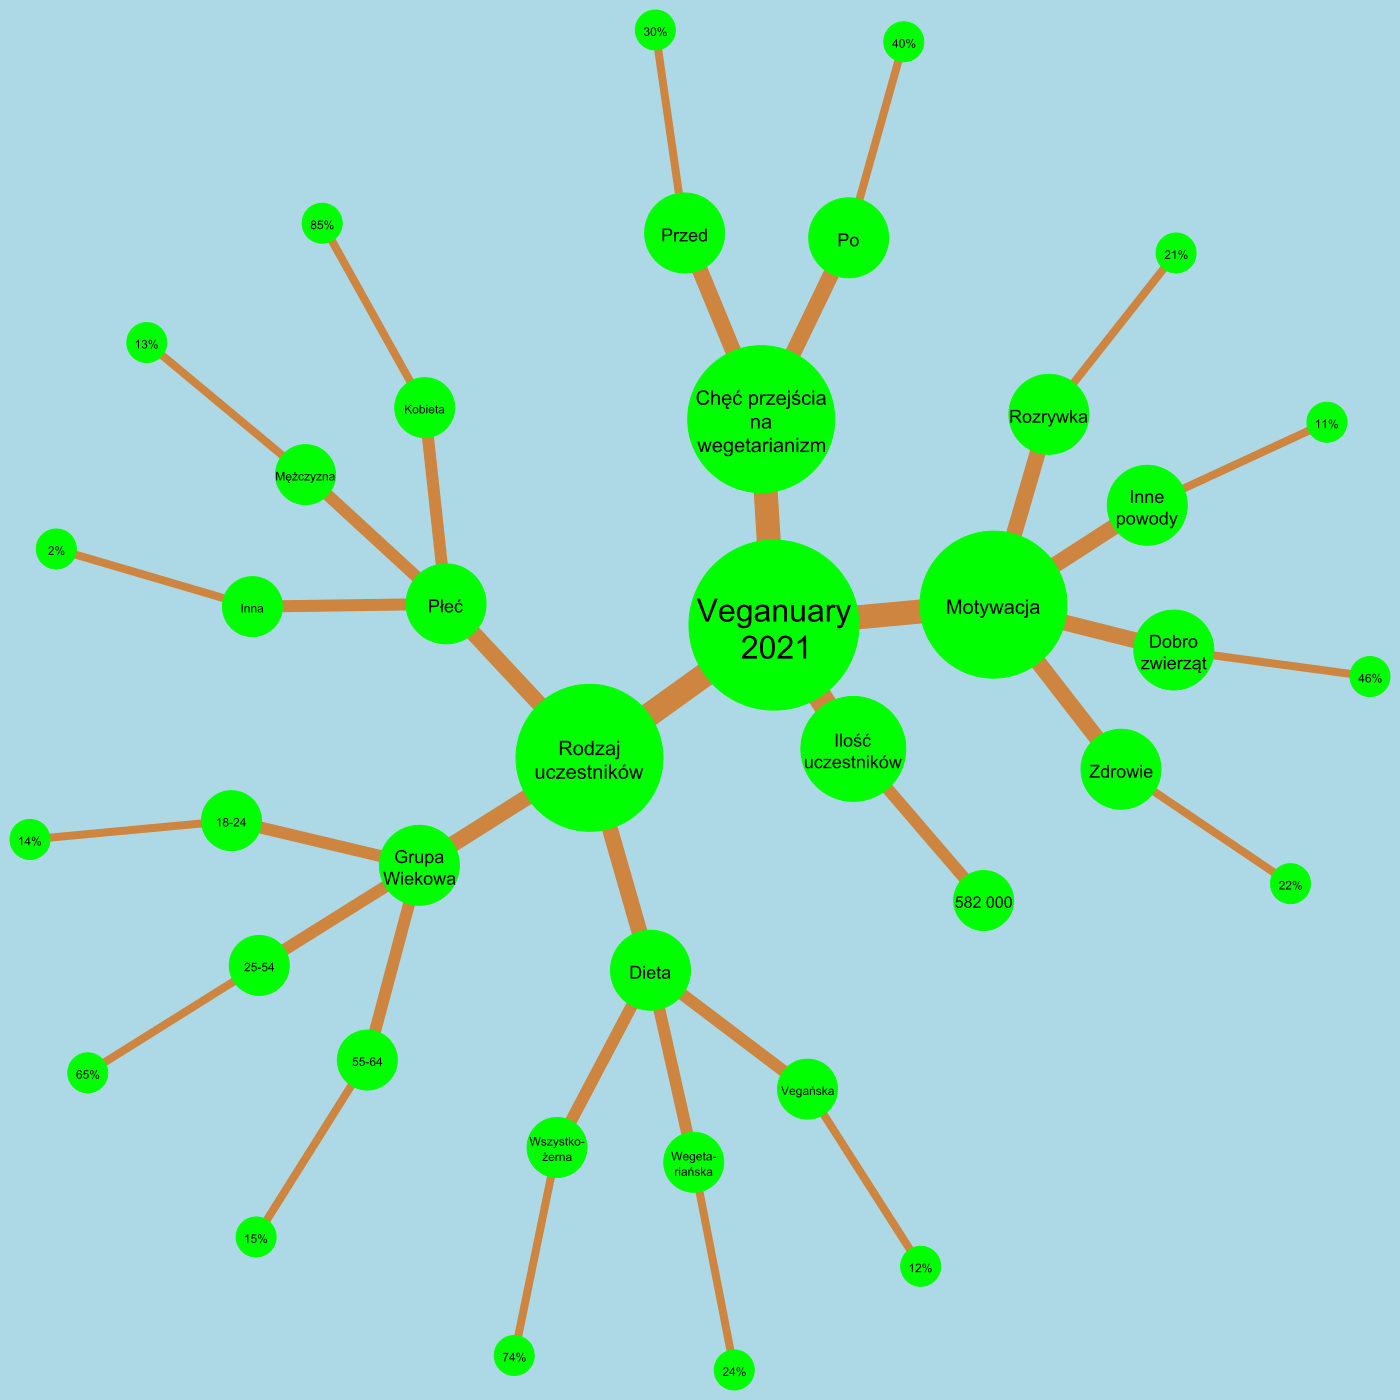

In [24]:
g = ig.Graph()
g.add_vertices(39)
g.add_edges([(0,1),(0,2),(0,3),(1,5),(1,6),(1,7),(2,8),(2,9),(2,10),(2,11),(3,12),(3,13),
             (4,14),(5,15),(5,16),(5,17),(6,18),(6,19),(6,20),(7,21),(7,22),(7,23),(8,24),(9,25),(10,26),(11,27),
             (12,28),(13,29),(15,30),(16,31),(17,32),(18,33),(19,34),(20,35),(21,36),(22,37),(23,38), (0,4)])
visual_style = {}
visual_style['bbox']=(1400,1400)
visual_style['vertex_label']=['Veganuary\n2021','Rodzaj\nuczestników','Motywacja','Chęć przejścia\nna\nwegetarianizm',
                              'Ilość\nuczestników','Grupa\nWiekowa','Płeć','Dieta','Dobro\nzwierząt','Zdrowie','Rozrywka',
                              'Inne\npowody','Przed','Po','582 000','18-24','25-54','55-64','Mężczyzna','Kobieta','Inna',
                              'Wszystko-\nżerna','Wegeta-\nriańska','Vegańska','46%','22%','21%','11%','30%','40%','14%',
                              '65%','15%','13%','85%','2%','74%','24%','12%']
visual_style['vertex_size']=[170,147,147,147,105,80,80,80,80,80,80,80,80,80,60,60,60,60,60,60,60,60,60,60,40,40,40,
                             40,40,40,40,40,40,40,40,40,40,40,40]
visual_style['vertex_label_size']=[32,20,20,20,18,18,18,18,18,18,18,18,18,18,16,12,12,12,12,12,12,12,12,12,12,12,12,
                                   12,12,12,12,12,12,12,12,12,12,12,12]
visual_style['edge_width']=[24,24,24,16,16,16,16,16,16,16,16,16,12,12,12,12,12,12,12,12,12,12,8,8,8,8,8,8,8,8,8,
                            8,8,8,8,8,8,24]
visual_style['edge_color']='peru'
visual_style['vertex_color']='green'
visual_style['vertex_frame_color']='green'
ig.plot(g, "Wizualizacja 7 - Mapa myśli.png", margin=30, **visual_style, background="lightblue")